In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import os
from tqdm.auto import tqdm
from numba import jit
import scipy

# loading all of the csv's from all of the simulations with the macro measured data (total energy, ent. excess, Paccept....)
simlist = []
datafiles = []
csvfiles = []
for root, dirs, files in os.walk("../data/400000"):
    for file in files:
        if file.endswith(".npz"):
            datafiles.append(os.path.join(root,file))
        if file.endswith(".csv"):
            csvfiles.append(os.path.join(root,file))
    for name in dirs:
        simlist.append(name)
simlist = sorted(simlist)
datafiles = sorted(datafiles)
csvfiles = sorted(csvfiles)
assert len(simlist) == len(datafiles) == len(csvfiles)
%matplotlib ipympl

../data/400000/phasediag_alignedlong4_K0.25_kbt0.1/phasediag_alignedlong4_K0.25_kbt0.1_data.npz


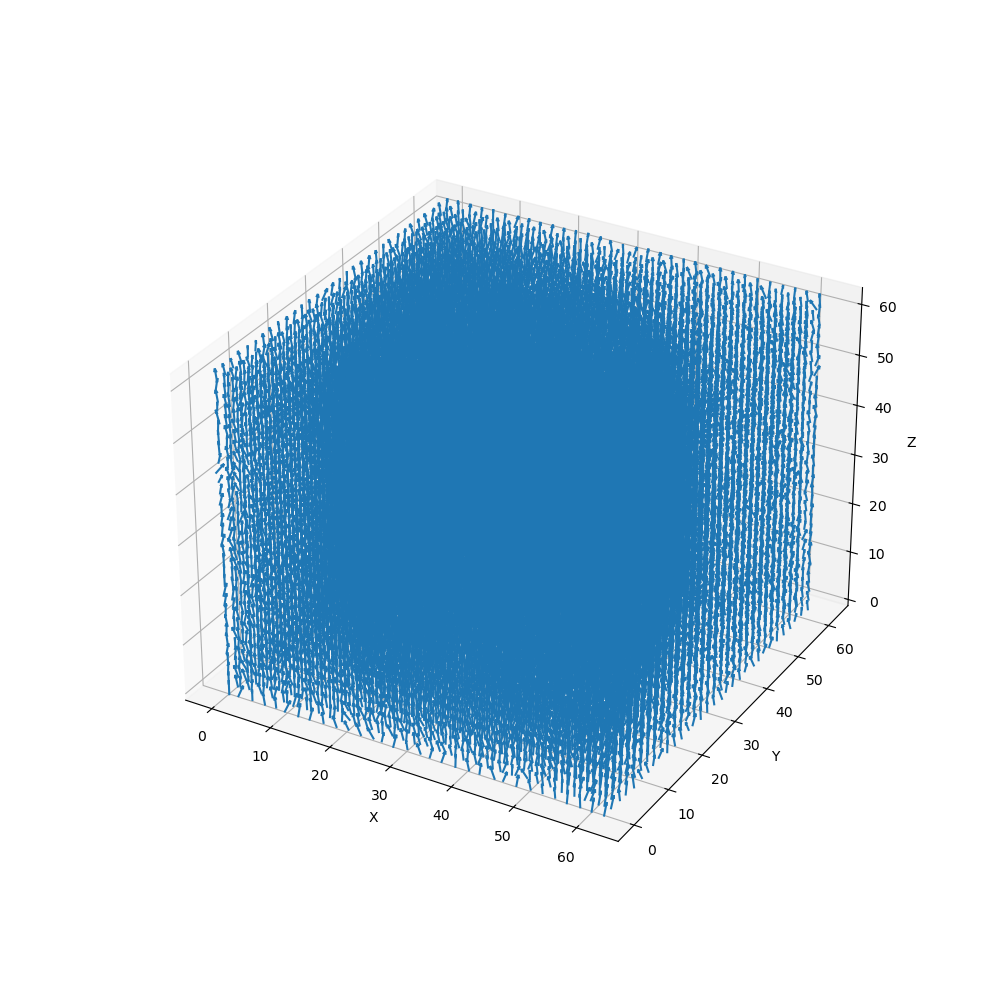

In [30]:
datafile = datafiles[31] #242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape
X,Z,Y = np.meshgrid(np.arange(0,ni,2),np.arange(0,nj,2),np.arange(0,nk,2))
u = data['nx'][::2,::2,::2]
v = data['ny'][::2,::2,::2]
w = data['nz'][::2,::2,::2]
s_color = data['s'][:,mp,:]
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})
ax.quiver(X,Y,Z,u,v,w,pivot='middle', normalize=True,length=2.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [22]:
u = data['nx'][::2,::2,::2]
v = data['ny'][:,:,:]
w = data['nz'][:,:,:]
print(u.shape)

(32, 32, 32)


In [46]:
def calculate_order_parameter(nx,ny,nz):
    P = np.zeros((nx.shape[0],nx.shape[1]))
    for i in np.arange(1,P.shape[0]-1):
        for j in np.arange(1,P.shape[1]-1):
            orig_theta = np.arctan2(ny[i,j],nx[i,j])
            theta = 3*(np.cos((np.arctan2(ny[i+1,j],nx[i+1,j])-orig_theta) +
                               (np.arctan2(ny[i+1,j+1],nx[i+1,j+1])-orig_theta) +
                               (np.arctan2(ny[i+1,j-1],nx[i+1,j-1])-orig_theta) +
                               (np.arctan2(ny[i,j+1],nx[i,j+1])-orig_theta) +
                                (np.arctan2(ny[i,j-1],nx[i,j-1])-orig_theta) +
                                (np.arctan2(ny[i-1,j+1],nx[i-1,j+1])-orig_theta) +
                                (np.arctan2(ny[i-1,j],nx[i-1,j])-orig_theta) +
                                (np.arctan2(ny[i-1,j-1],nx[i-1,j-1])-orig_theta))**2)-1
            P[i,j] = 0.5*theta/8
    return P

In [57]:
def calculate_energy(nx,ny,nz):
    E = np.zeros(nx.shape)
    for i in np.arange(1,E.shape[0]-1):
        for j in np.arange(1,E.shape[1]-1):
            for k in np.arange(1,E.shape[2]-1):
                ddot = nx[i,j,k]*nx[i+1,j,k] + ny[i,j,k]*ny[i+1,j,k] + nz[i,j,k]*nz[i+1,j,k]
                E[i,j,k] += (1.0 - ddot*ddot)
                ddot = nx[i,j,k]*nx[i-1,j,k] + ny[i,j,k]*ny[i-1,j,k] + nz[i,j,k]*nz[i-1,j,k]
                E[i,j,k] += (1.0 - ddot*ddot)
                ddot = nx[i,j,k]*nx[i,j+1,k] + ny[i,j,k]*ny[i,j+1,k] + nz[i,j,k]*nz[i,j+1,k]
                E[i,j,k] += (1.0 - ddot*ddot)
                ddot = nx[i,j,k]*nx[i,j-1,k] + ny[i,j,k]*ny[i,j-1,k] + nz[i,j,k]*nz[i,j-1,k]
                E[i,j,k] += (1.0 - ddot*ddot)
                ddot = nx[i,j,k]*nx[i,j,k+1] + ny[i,j,k]*ny[i,j,k+1] + nz[i,j,k]*nz[i,j,k+1]
                E[i,j,k] += (1.0 - ddot*ddot)
                ddot = nx[i,j,k]*nx[i,j,k-1] + ny[i,j,k]*ny[i,j,k-1] + nz[i,j,k]*nz[i,j,k-1]
                E[i,j,k] += (1.0 - ddot*ddot)
    return E

../data/400000/phasediag_alignedlong4_K3.0_kbt0.6/phasediag_alignedlong4_K3.0_kbt0.6_data.npz


[]

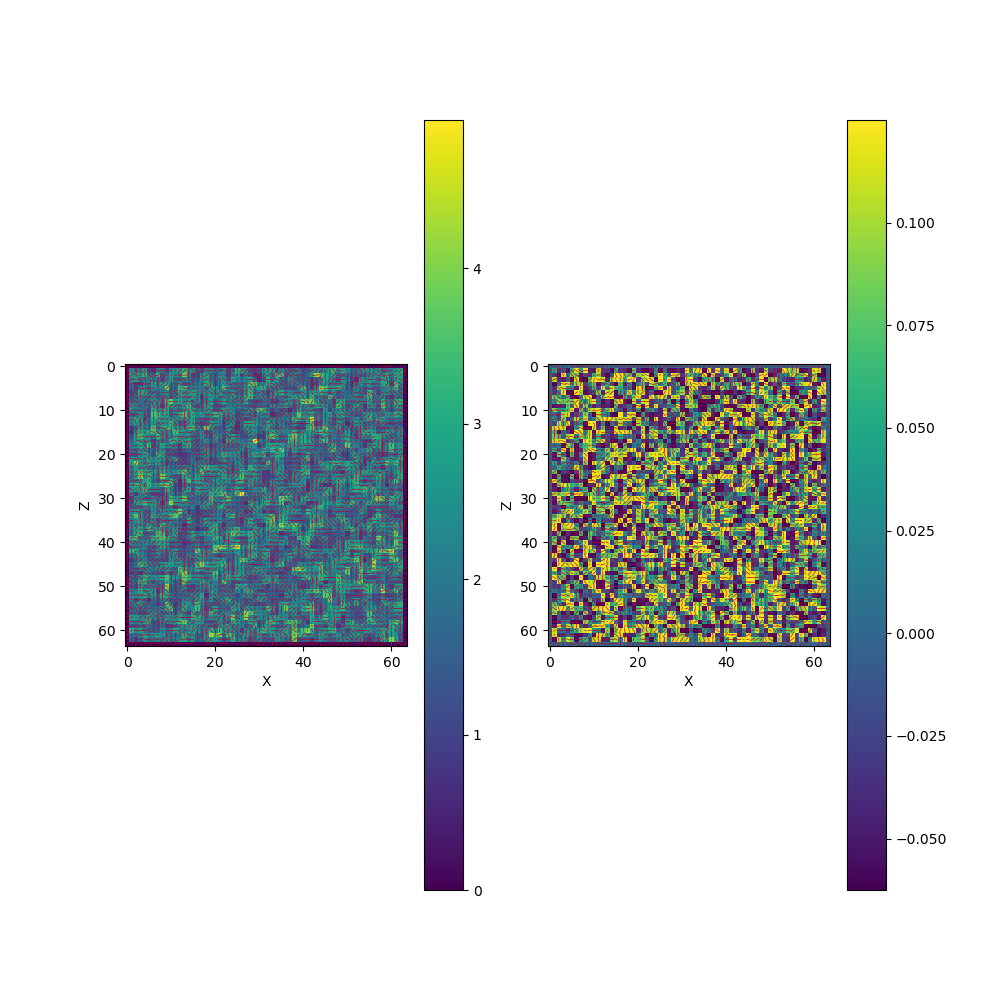

In [99]:
datafile = datafiles[371] #242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape
X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
mp = int(np.floor(nj/2))
u = data['nx'][:,mp,:]
v = data['ny'][:,mp,:]
w = data['nz'][:,mp,:]
s_color = data['s'][:,mp,:]
P = calculate_order_parameter(u,v,w)
E = calculate_energy(data['nx'],data['ny'],data['nz'])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
im1 = ax1.imshow(E[:,mp,:])
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax2.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
im2 = ax2.imshow(P)
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2,ax = ax2)
plt.plot()

In [75]:
def calculate_Q_tensor(nx, ny, nz):
    """
    Calculate the Q-tensor for every point in the 3D array of director components.

    Parameters:
    nx, ny, nz : numpy arrays
        Arrays representing the x, y, and z components of the director field.

    Returns:
    Q : numpy array
        Array representing the Q-tensor Q_ij at each point.
    """
    # Calculate Q-tensor components
    Q11 = 3/2 * (nx**2 - 1/3)
    Q12 = 3/2 * (nx * ny)
    Q13 = 3/2 * (nx * nz)
    Q21 = Q12
    Q22 = 3/2 * (ny**2 - 1/3)
    Q23 = 3/2 * (ny * nz)
    Q31 = Q13
    Q32 = Q23
    Q33 = 3/2 * (nz**2 - 1/3)
    
    # Stack the components into a 3x3x...x3 tensor
    Q = np.stack((np.stack((Q11, Q12, Q13), axis=-1),
                  np.stack((Q21, Q22, Q23), axis=-1),
                  np.stack((Q31, Q32, Q33), axis=-1)), axis=-1)
    
    return Q
    
def calculate_winding_number(Q):
    """
    Calculate the winding number (topological charge) for every point in the Q-tensor.

    Parameters:
    Q : numpy array
        Array representing the Q-tensor Q_ij at each point.

    Returns:
    winding_number : numpy array
        Array representing the winding number at each point.
    """
    # Calculate the trace of Q^2
    Q_squared = np.matmul(Q, Q)
    Q_trace = np.trace(Q_squared, axis1=-2, axis2=-1)
    
    # Calculate the winding number
    winding_number = Q_trace / (4 * np.pi)
    return winding_number

def calculate_winding_number_director(nx, ny, nz):
    """
    Calculate the winding number (topological charge) for every point using the director components.

    Parameters:
    nx, ny, nz : numpy arrays
        Arrays representing the x, y, and z components of the director field.

    Returns:
    winding_number : numpy array
        Array representing the winding number at each point.
    """
    # Calculate derivatives of n
    dnx_dx = np.gradient(nx)[0]
    dnx_dy = np.gradient(nx)[1]
    dny_dx = np.gradient(ny)[0]
    dny_dy = np.gradient(ny)[1]
    dnz_dx = np.gradient(nz)[0]
    dnz_dy = np.gradient(nz)[1]
    
    # Calculate components of the curl of n
    curl_nx = dny_dx * dnz_dy - dnz_dx * dny_dy
    curl_ny = dnz_dx * dnx_dy - dnx_dx * dnz_dy
    curl_nz = dnx_dx * dny_dy - dny_dx * dnx_dy
    
    # Calculate the winding number
    winding_number = nx * curl_nx + ny * curl_ny + nz * curl_nz
    
    return winding_number

../data/400000/phasediag_alignedlong4_K3.0_kbt0.6/phasediag_alignedlong4_K3.0_kbt0.6_data.npz
(64, 64, 64, 3, 3)
(64, 64, 64)
1.5707963267948966


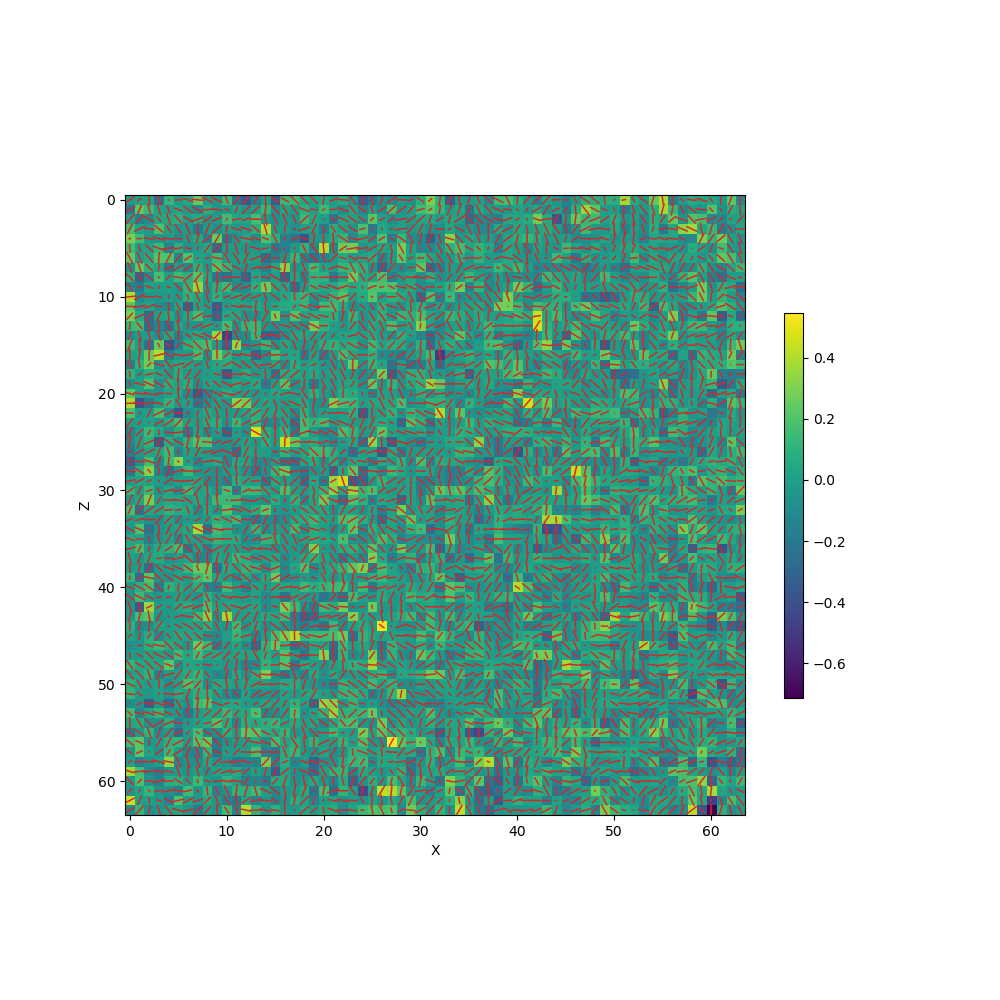

In [100]:
"""
# Compute the gradient of the director field
grad_nx = np.gradient(nx_smooth)
grad_ny = np.gradient(ny_smooth)
grad_nz = np.gradient(nz_smooth)

# Compute the Laplacian to identify singularities
laplace_nx = laplace(nx_smooth)
laplace_ny = laplace(ny_smooth)
laplace_nz = laplace(nz_smooth)

# Example of finding defect points where the Laplacian is large
defect_points = np.where(np.abs(laplace_nx) > threshold)
"""
datafile = datafiles[371] #242
print(datafile)
data = np.load(datafile)
ni,nj,nk = data['nx'].shape
X,Z = np.meshgrid(np.arange(0,ni),np.arange(0,nk))
mp = int(np.floor(nj/2))
nx = data['nx']
ny = data['ny']
nz = data['nz']
u = nx[:,mp,:]
v = ny[:,mp,:]
w = nz[:,mp,:]
Q = calculate_Q_tensor(nx, ny, nz)
print(Q.shape)
W = calculate_winding_number_director(nx, ny, nz)
print(W.shape)
W_color = W[:,mp,:]
s_color = data['s'][:,mp,:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#ax.quiver(X,Z,u,w,s_color,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,cmap='coolwarm')
ax.quiver(X,Z,u,w,pivot='mid',headlength=0,headwidth=0,headaxislength=0,scale_units='xy',scale=0.75,color="tab:red")
im = ax.imshow(W_color)
cbar1 = plt.colorbar(im, ax=ax,shrink=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.plot()
print(np.pi/2)

[0]


TypeError: Axes3D.scatter() missing 1 required positional argument: 'ys'

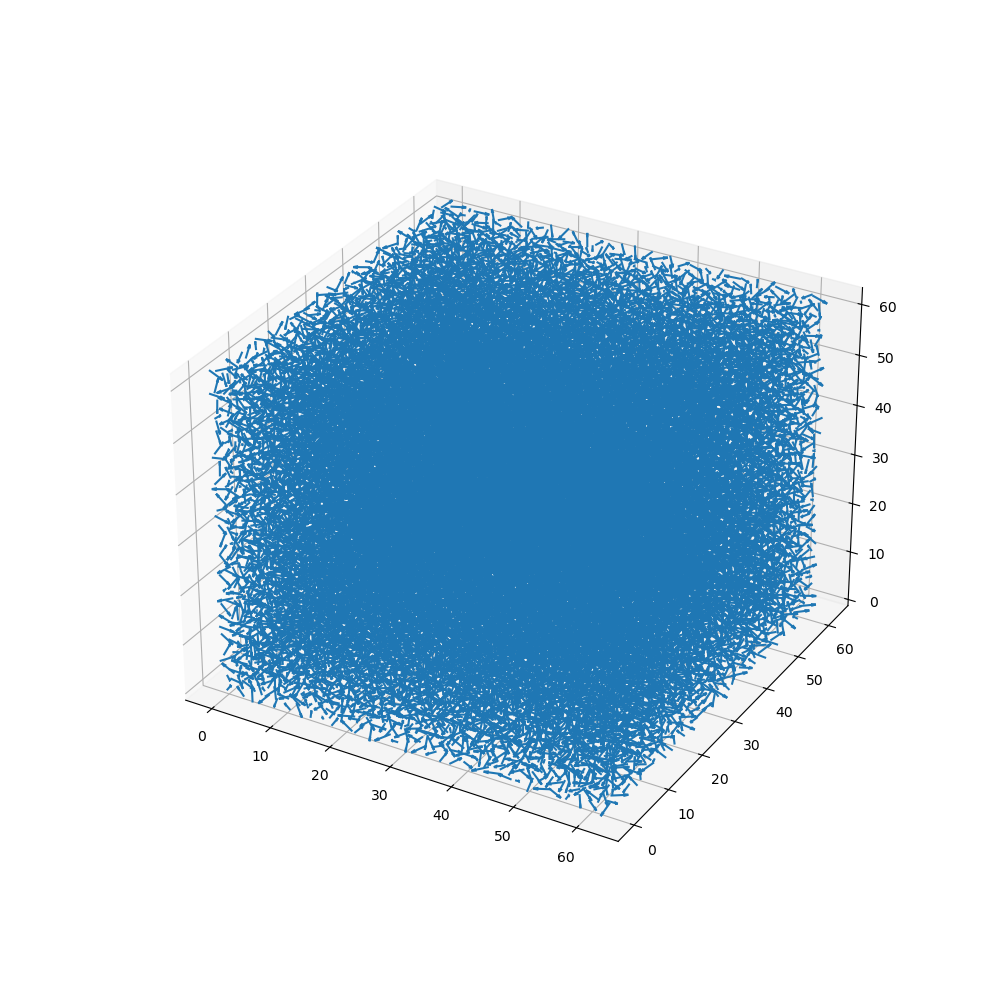

In [95]:
ni,nj,nk = data['nx'].shape
X,Z,Y = np.meshgrid(np.arange(0,ni,2),np.arange(0,nj,2),np.arange(0,nk,2))
u = data['nx'][::2,::2,::2]
v = data['ny'][::2,::2,::2]
w = data['nz'][::2,::2,::2]
W = W[::2,::2,::2]
print(np.where(np.abs(W)>0.2))
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})
ax.quiver(X,Y,Z,u,v,w,pivot='middle', normalize=True,length=2.5)
ax.scatter(W)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()